# Quest 8. Regression Transpose

__Seung Ki Lee__  
__35460312__  

Here are the function implementations for individual transpose method

**Matrix Definition**
```python
given an n x m matrix

matrix = [ [1,2,3], 
           [4,5,6], 
           [7,8,9] ]

Where n = number of rows
      m = number of elements in a row = number of columns

```


**Simple**
```python
[[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
```
This is using list comprehension. Inner list containing for j, will create a list element with length equal to number of the rows in the matrix. Outer list repeats this for as many times as the number of columns, or the number of elements in the initial matrix's rows. 

Time Complexity of this is $O(nm) = O(n^2) \ | \ n = m$

**Zip**
```python
zip(*matrix)
```
This is a cool way of using advnaced python function zip. Since the implementation shows no implementation, I cannot guess its time complexity.

**Numpy**
```python
import numpy as np
np.transpose(marix)
```
This is standard numpy implementation. It shows no implementation so I cannot guess its time complexity, but knowing the optimizations being done in other numpy functions I can assume that it will have faster than list comprehension.

## Hypothesis

I hypothesis that list comprehension will take the most time as well as memory. It requires doubling of the matrix for copying.

Second fastest one would be zip, as zip is not necessarily made for matrix operations.

The fastest will be numpy as it is optimzed for large matrix operations.

# Code

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Matrix class

To simplify running three different transpose functions, I wrapped them in a class.

In [2]:
class Matrix:
    def __init__(self, matrix):
        self.matrix = matrix

    def transpose(self):
        start = time.time()
        [[self.matrix[j][i] for j in range(len(self.matrix))] for i in range(len(self.matrix[0]))]
        end = time.time()
        return end - start

    def zip_transpose(self):
        # may not need to include list conversion for timing
        start = time.time()
        zip(*self.matrix)
        end = time.time()
        return end - start
    
    def numpy_transpose(self):
        start = time.time()
        np.transpose(self.matrix)
        end = time.time()
        return end - start

## Getting all time

In [3]:
def get_time(n, m):
    m0 = matrix.np.random.rand(n, m)
    mat = matrix.Matrix(m0)
    tsimple = mat.transpose()
    tzip = mat.zip_transpose()
    tnumpy = mat.numpy_transpose()
    print('Simple: {0:.7f} sec'.format(tsimple))
    print('Zip:    {0:.7f} sec'.format(tzip))
    print('Numpy:  {0:.7f} sec'.format(tnumpy))

## Run on Genuse

Computation of Large has crashed my computer so I uploaded the python code to Lyle Genuse server and ran them to retrieve the time for plotting. Screenshot of the result is at the bottom.

# Graphs of Absolute Time Elapsed

Y axis is log scaled for visibility

## Small (200 x 200)

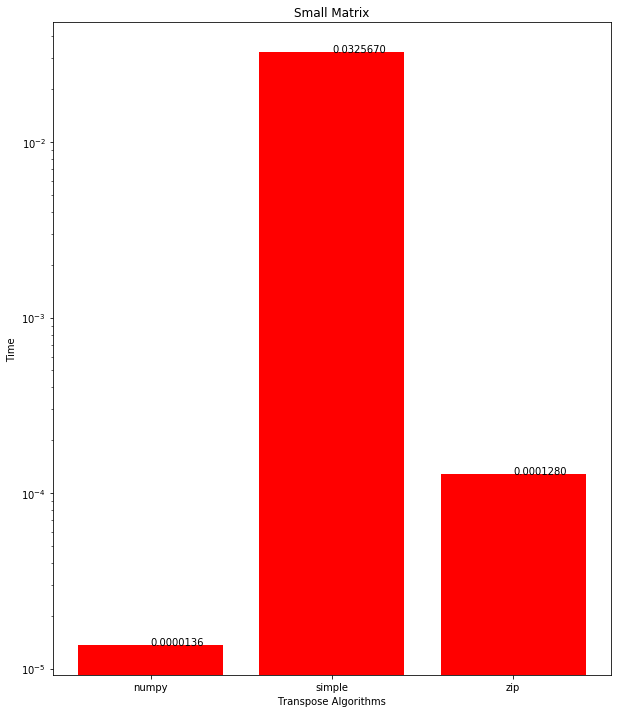

In [4]:
sx = ["simple", "zip", "numpy"]
sy = [0.0325670, 0.0001280, 0.0000136]
fig = plt.figure(figsize=(10,12))
plt.bar(sx, sy, color='red')
plt.xlabel("Transpose Algorithms")
plt.ylabel("Time")
plt.yscale("log")
plt.title("Small Matrix")
ax = fig.add_subplot(111)
for i,j in zip(sx,sy):
    ax.annotate(str("{0:.7f}".format(j)),xy=(i,j))
plt.show()

## Medium (2000 X 2000)

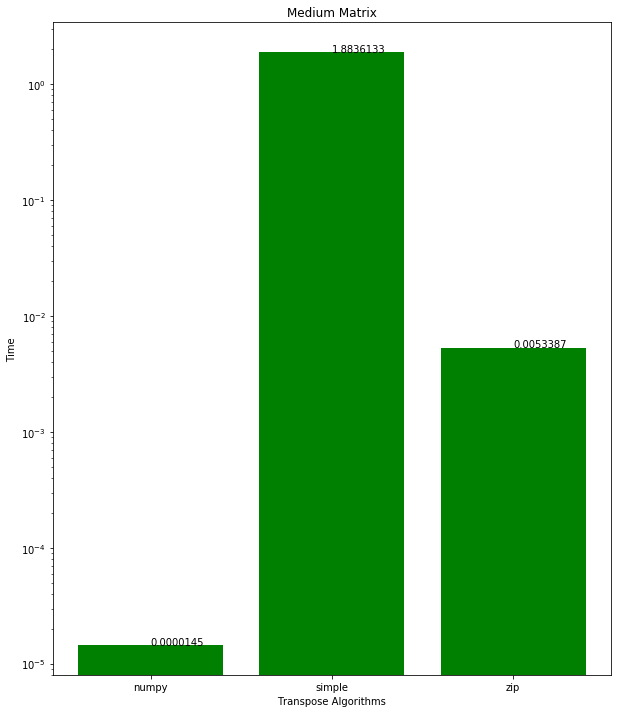

In [5]:
mx = ["simple", "zip", "numpy"]
my = [1.8836133, 0.0053387, 0.0000145]
fig = plt.figure(figsize=(10,12))
plt.bar(mx, my, color='green')
plt.xlabel("Transpose Algorithms")
plt.ylabel("Time")
plt.yscale("log")
plt.title("Medium Matrix")
ax = fig.add_subplot(111)
for i,j in zip(mx,my):
    ax.annotate(str("{0:.7f}".format(j)),xy=(i,j))
plt.show()

## Large (20000 X 20000)

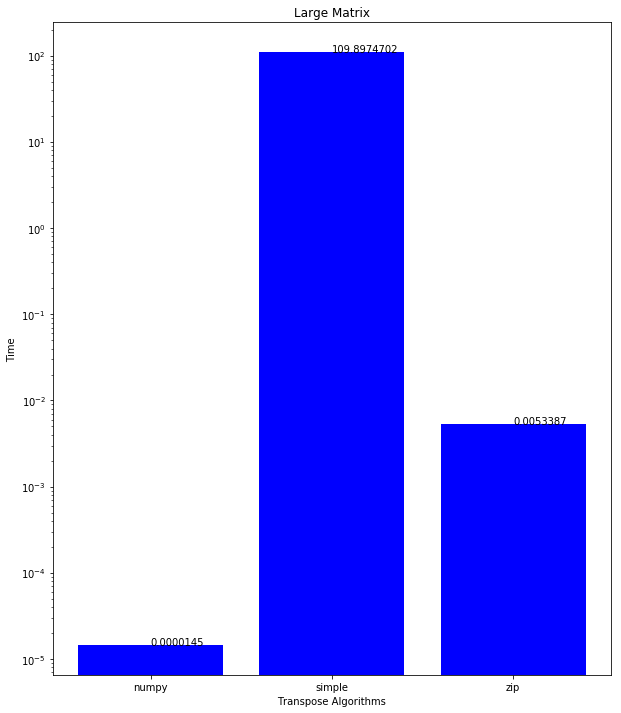

In [6]:
lx = ["simple", "zip", "numpy"]
ly = [109.8974702, 0.0053387, 0.0000145]
fig = plt.figure(figsize=(10,12))
plt.bar(lx, ly, color='blue')
plt.xlabel("Transpose Algorithms")
plt.ylabel("Time")
plt.yscale("log")
plt.title("Large Matrix")
ax = fig.add_subplot(111)
for i,j in zip(lx,ly):
    ax.annotate(str("{0:.7f}".format(j)),xy=(i,j))
plt.show()


## Really Large (50000 x 50000)

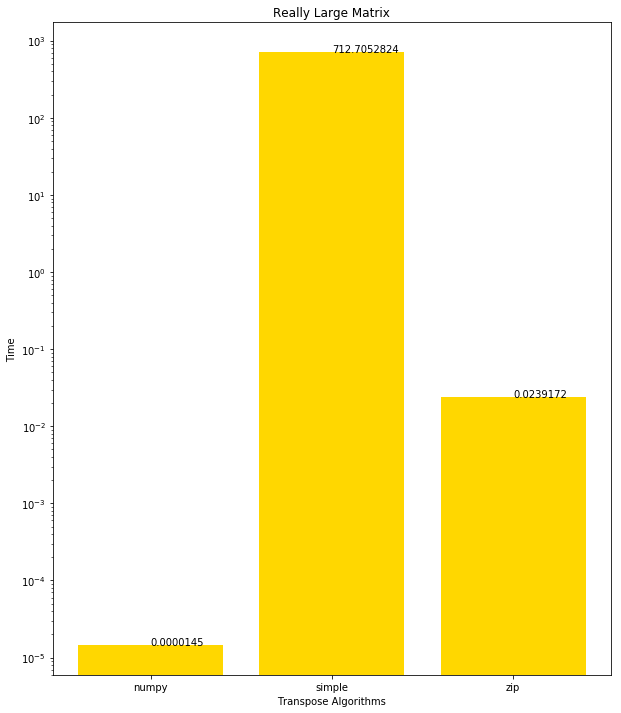

In [7]:
rx = ["simple", "zip", "numpy"]
ry = [712.7052824, 0.0239172, 0.0000145]
fig = plt.figure(figsize=(10,12))
plt.bar(rx, ry, color='gold')
plt.xlabel("Transpose Algorithms")
plt.ylabel("Time")
plt.yscale("log")
plt.title("Really Large Matrix")
ax = fig.add_subplot(111)
for i,j in zip(rx,ry):
    ax.annotate(str("{0:.7f}".format(j)),xy=(i,j))
plt.show()

## Comparing Time Complexity

Graphing change in time elapse as n grows

### Data

In [8]:
fullx = ["1. small (200x200)", "2. medium(2000x2000)", "3. large(20000x20000)", "4. reallylarge(50000x50000)"]
simpley = [sy[0], my[0], ly[0], ry[0]]
zipy = [sy[1], my[1], ly[1], ry[1]]
numpyy= [sy[2], my[2], ly[2], ry[2]]

### Linear

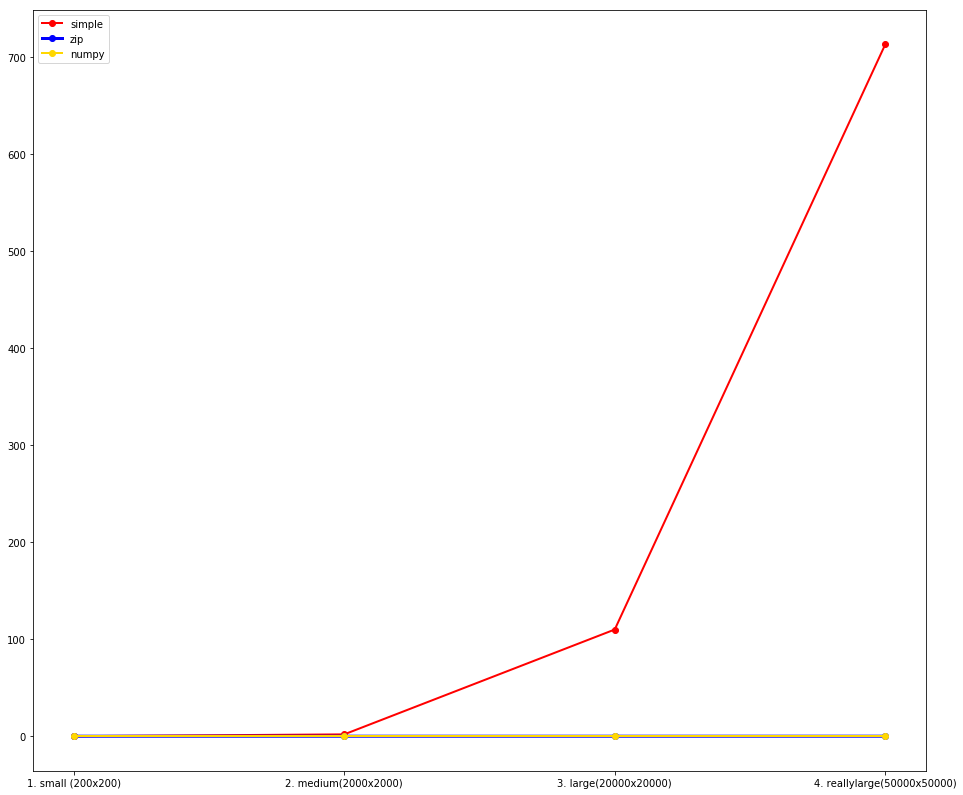

In [9]:
fig = plt.figure(figsize=(16,14))
plt.plot( fullx, simpley, marker='o',  markerfacecolor='red', color='red', linewidth=2, label="simple")
plt.plot( fullx, zipy, marker='o',  markerfacecolor='blue', color='blue', linewidth=3, label="zip")
plt.plot( fullx, numpyy, marker='o', markerfacecolor='gold', color='gold', linewidth=2, label="numpy")
plt.legend()


### Log Scale Y

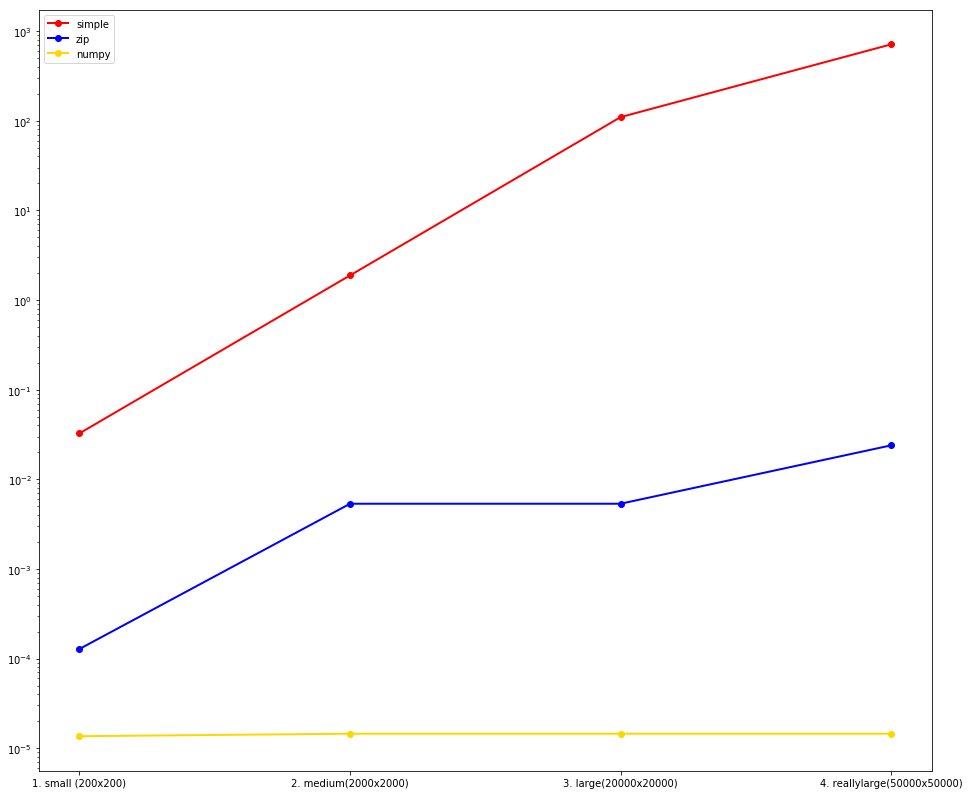

In [10]:
fig = plt.figure(figsize=(16,14))
plt.yscale('log')
plt.plot( fullx, simpley, marker='o',  markerfacecolor='red', color='red', linewidth=2, label="simple")
plt.plot( fullx, zipy, marker='o',  markerfacecolor='blue', color='blue', linewidth=2, label="zip")
plt.plot( fullx, numpyy, marker='o', markerfacecolor='gold', color='gold', linewidth=2, label="numpy")
plt.legend()


### Comparing Zip and Numpy only

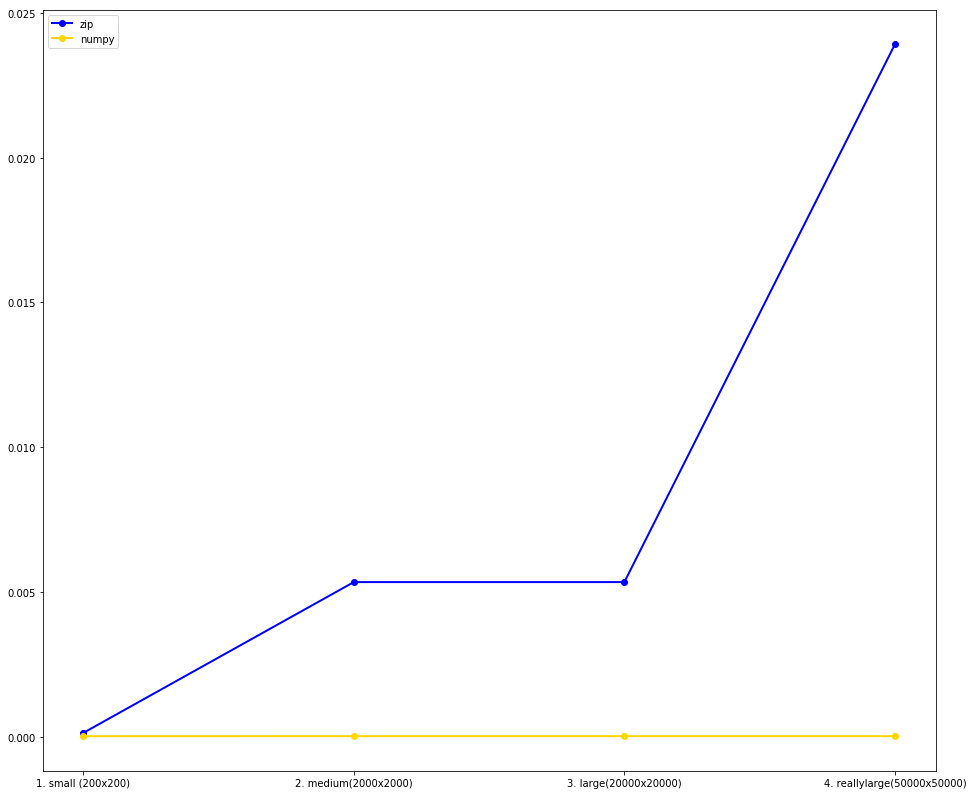

In [11]:
fig = plt.figure(figsize=(16,14))
plt.plot( fullx, zipy, marker='o',  markerfacecolor='blue', color='blue', linewidth=2, label="zip")
plt.plot( fullx, numpyy, marker='o', markerfacecolor='gold', color='gold', linewidth=2, label="numpy")
plt.legend()

## Observation

From the Graphs, I can confirm that simple transpose exhibits exponential shape. Numpy obviously is constant. Zip shows Big O pattern of somewhere in between $n$ and $n^2$. I was correct on my assumption that numpy would be the fastest, but I did not assume it to be constant time so I am surprised.

## Appendix

![genuse](genuse_quest8.png)